# Rabbit and Wolf Population Dynamics Project

For our project, we researched rabbit and wolf population dynamics to predict an answer to the question "How will varrying the initial predator population affect the prey population? Specifically, how many generations will it take for the rabbit population to become extinct (if it becomes extinct at all).

Our question is impactful because it shows the affect of the introduction of a predator on a prey population. People who run national or state parks could use our model when deciding how many of a new species to introduce. Also, our model could be used to inform those who hunt rabbits, wolves, or any species about the predator-prey relationship cycles so that they can be careful not to harm the populations with their hunting. 
  
  We used Lotka–Volterra equations to model our wolf and rabbit populations. These equations update prey and predator populations based on the animal's own growth minus the rate at which the animal is preyed upon. There are some issues with the equations. For example, the model does not account for environmental factors, like limited resources and random destructive weather. Another flaw of Lotka–Volterra equations relates to equilibirum. Based on the constants of the predator's and prey's growth and mortality rates, there is some non-zero population point at which neither population will change again and the non-zero prey and predator populations will stay the same indefinitely. 
  
  Our model was based on information from http://www2.nau.edu/lrm22/lessons/predator_prey/predator_prey.html. The Excel spreadsheet on this site gave us the starting rabbit population and the rate of rabbit growth, wolf growth, and wolf mortality for the Lotka–Volterra equations.
  
  For our model, we assumed that the rate of rabbit growth, wolf growth, and wolf mortality that we got from our Excel sheet did not change. We also assumed that if a population got small enough- 50 for the prey and 10 for the predators- it would die out despite the Lotka–Volterra making the population always recover. We did not include outside environmental variables or seasonal changes in natural birth and death rates.

In [4]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline
# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
# import functions from the modsim.py module
from modsim import *
from pandas import read_html

### Update Function

Our update function changes the prey and predator population primarily using our Lotka–Volterra equations, but there are certain exceptions. For instance, we added if statements so that the populations cannot not exceed our carrying capacity of 250. We had to create an if statement to make this approach of carrying capacity non-linear. We also used an if statement to show the decay of population to extinction since the Lotka–Volterra equations do not allow for a population to become extinct.

In [77]:
def update(r_pop, y_pop):
    if y_pop>250: #makes it so the prey population cannot grow over 250 animals
        y_pop = 250
    elif y_pop>200: #once prey population gets to 200, the growth rate starts to decrease 
        y_pop = ((250/y_pop)-1) + y_pop
    elif y_pop>50:
        y_pop = (0.03*y_pop)-(0.0005*y_pop*r_pop) + y_pop #updates the prey pop using Lotka-Volterra 
    elif y_pop>0:
        y_pop = (0-y_pop)*0.04 + y_pop #decreases the population to zero over time
    else:
        y_pop = 0 #sets population to zero if population is less than zero
        
    if r_pop>250: #stops predator population from going over 250
        r_pop = 250
    elif r_pop>200: #once predator population reaches 200, the growth rate starts to decrease
        r_pop = ((250/r_pop)-1) + r_pop
    elif r_pop>0:
        r_pop = (0.0005*y_pop*r_pop - 0.05*r_pop) + r_pop #updates the predators pop using Lotka-Volterra 
    elif r_pop>0:
        r_pop-=0.01
    else:
        r_pop = 0
        
    return r_pop, y_pop #returns values for predator and prey population
    

### Run Simulation Function

Our run simulation function creates 2 time series- one to store values of the prey population and another of the predator population and fills the time series with results from the update function.

In [78]:
def run_simulation(system):
    results_y = TimeSeries() #sets up a timeseries to store prey results
    results_r = TimeSeries() #stores predator results
    results_y[system.t_0] = system.y_initial_pop #inserts initial value of t_0 into timeseries
    results_r[system.t_0] = system.r_initial_pop

    for t in linrange(system.t_0, system.t_end): #for loop that iterates through linrange
        results_r[t+1], results_y[t+1] = update(results_r[t], results_y[t]) #adds results to timeseries as simulation runs
        
    return results_r, results_y 

In [79]:
def plot_results(results, label):
    plot(results, label=label) #plots results of timeseries
    
    decorate(xlabel='Time(days)', #labels graph
             ylabel='Population',
             title='Time Vs Pop')

### Original Function from Online Model of Wolves and Rabbits
This graph shows the original plot of predator vs prey population over time using the same initial values of 100 prey and 100 predators that the excel model used. We needed to make sure that we could correctly imitate the excel model before we modified the input. If you open the excel spreadsheet that the model is based on, you will notice that our graph is exactly the same as the spreadsheet's, showing that our model correctly imitates the one online. 

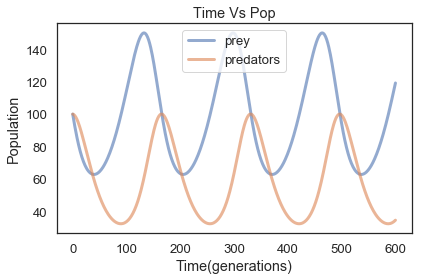

In [80]:
ry_system = System(t_0=0, #sets up system
               t_end=600,
               y_initial_pop=100,
               r_initial_pop=100
                )
results_r, results_y = run_simulation(ry_system) #sets results to the results of the system running

plot_results(results_y, 'prey') #plots prey data

decorate(xlabel='Time(days)', 
     ylabel='Prey Population',
     title='Time Vs Prey Pop')

plot_results(results_r, 'predators') #plots predator data

decorate(xlabel='Time(generations)', 
     ylabel='Population',
     title='Time Vs Pop')


### Time Vs Prey Population
We made a linrange that stored values of the predators from 50 to 500 with a step size of 100. This allowed us to run our simulation with different values of wolves while the rabbit population stayed the same and plot our results. The data shows that the prey will become extinct when the initial predator population is 150 or greater, but the population is stable when the initial predator population is 100 or less. 

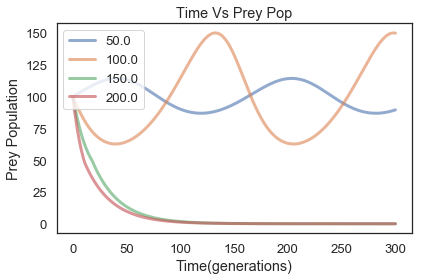

In [81]:
r_initial_pop_array = linrange (50, 200, 50, endpoint=True) 


for r_pop in r_initial_pop_array:
    ry_system = System(t_0=0,
                   t_end=300,
                   y_initial_pop=100,
                   r_initial_pop=r_pop
                    )
    results_r, results_y = run_simulation(ry_system)

    plot_results(results_y, r_pop)

    decorate(xlabel='Time(generations)', 
         ylabel='Prey Population',
         title='Time Vs Prey Pop')



## Time Vs Predator Population
Varrying the Predator Population

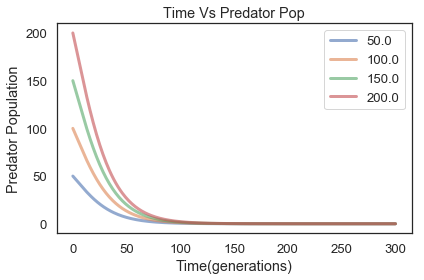

In [82]:
r_initial_pop_array = linrange (50, 200, 50, endpoint=True) 


for r_pop in r_initial_pop_array:
    ry_system = System(t_0=0,
                   t_end=300,
                   y_initial_pop=50,
                   r_initial_pop=r_pop
                    )
    results_r, results_y = run_simulation(ry_system)

    plot_results(results_r, r_pop)
#    print(results_r, r_pop)

    decorate(xlabel='Time(generations)', 
         ylabel='Predator Population',
         title='Time Vs Predator Pop')
